In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('C:/Users/zanin/OneDrive/Área de Trabalho/airbnbrj/listingsrj.csv')
df.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,53344884,https://www.airbnb.com/rooms/53344884,20220921172238,2022-09-22,city scrape,Suntuoso apartamento em Copacabana posto 6,suntuoso apartamento de frente para o mar <br ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,431412286,...,NaN,NaN,NaN,NaN,t,10,8,2,0,NaN
1,7801456,https://www.airbnb.com/rooms/7801456,20220921172238,2022-09-22,city scrape,Ipanema Vieira Souto - Linda Vista,Flat luxuoso com a melhor localização do Rio d...,"Ipanema é considerado o berço do rio, cheio de...",https://a0.muscache.com/pictures/99276394/dc9c...,40650139,...,NaN,NaN,NaN,NaN,t,5,5,0,0,NaN
2,14333905,https://www.airbnb.com/rooms/14333905,20220921172238,2022-09-22,city scrape,Casa compartilhada,"A 15 min. do complexo esportivo de Deodoro, Ca...",NaN,https://a0.muscache.com/pictures/15235501-16c4...,87749071,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26366 entries, 0 to 26365
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26366 non-null  int64  
 1   listing_url                                   26366 non-null  object 
 2   scrape_id                                     26366 non-null  int64  
 3   last_scraped                                  26366 non-null  object 
 4   source                                        26366 non-null  object 
 5   name                                          26347 non-null  object 
 6   description                                   25539 non-null  object 
 7   neighborhood_overview                         13895 non-null  object 
 8   picture_url                                   26366 non-null  object 
 9   host_id                                       26366 non-null 

In [4]:
cols = ['price', 'neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'host_since',
 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_identity_verified', 'number_of_reviews', 'reviews_per_month', 'review_scores_accuracy', 
'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']

df = df[cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26366 entries, 0 to 26365
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        26366 non-null  object 
 1   neighbourhood_cleansed       26366 non-null  object 
 2   property_type                26366 non-null  object 
 3   room_type                    26366 non-null  object 
 4   accommodates                 26366 non-null  int64  
 5   bathrooms_text               26316 non-null  object 
 6   bedrooms                     25055 non-null  float64
 7   beds                         26130 non-null  float64
 8   amenities                    26366 non-null  object 
 9   host_since                   26361 non-null  object 
 10  host_response_time           22857 non-null  object 
 11  host_response_rate           22857 non-null  object 
 12  host_is_superhost            26359 non-null  object 
 13  host_identity_ve

In [5]:
df.dtypes

price                           object
neighbourhood_cleansed          object
property_type                   object
room_type                       object
accommodates                     int64
bathrooms_text                  object
bedrooms                       float64
beds                           float64
amenities                       object
host_since                      object
host_response_time              object
host_response_rate              object
host_is_superhost               object
host_identity_verified          object
number_of_reviews                int64
reviews_per_month              float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
dtype: object

In [6]:
# change name column as in original data neighbourhood_cleansed is more accurate then neighbourhood, and bathrooms_text it's where content the real data about baths
df = df.rename(columns={'neighbourhood_cleansed': 'neighbourhood', 'bathrooms_text': 'bathrooms'})

In [7]:
# host_response_rate, from % to float
df['host_response_rate'] = df['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)

# host_acceptance_rate, from % to float
df['host_response_rate'] = df['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)

In [8]:
def DaysPassed(col, df):
    # convert to datetime dtype
    df[col] = pd.to_datetime(df[col])
    
    # date when the dataset was scrapped
    last_scraped = pd.to_datetime("2016-09-07")
    
    # return the difference between the 2 dates in days
    return (last_scraped - df[col]).dt.days 

In [9]:
# from date to days since
df['host_since'] = DaysPassed('host_since', df)

**CATEGORICAL FEATURES** - Amenities

To handdle the categorical data amenities, i decided to treate appart from the other categorical features, because on how this data was stored by hosts, even trying to group the amenities that's appears more, we keep having more the 3 thousand groups with the amenenities that appeared more, so bellow have a plot with 30 group of amenities that more appears.

In [10]:
#confering the numeber of rows and 
df['amenities'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26366 entries, 0 to 26365
Series name: amenities
Non-Null Count  Dtype 
--------------  ----- 
26366 non-null  object
dtypes: object(1)
memory usage: 206.1+ KB


In [11]:
# trying to descover howmany unique amenities have on this column
df['amenities'].nunique()

24057

In [12]:
# grouping the amenities that appered more on the data
pd.Series(np.concatenate(df['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(30)

 "Kitchen"                       23008
 "Wifi"                          22749
 "Long term stays allowed"       21753
 "Essentials"                    19615
 "Hangers"                       16603
 "Hot water"                     16313
 "Elevator"                      14608
 "Dishes and silverware"         14553
 "Iron"                          14268
 "Refrigerator"                  13529
 "Cooking basics"                13518
 "Microwave"                     12619
 "Washer"                        12455
 "Coffee maker"                  12265
 "Bed linens"                    11852
 "Hair dryer"                    11197
 "Air conditioning"              10860
 "Oven"                           8383
 "Extra pillows and blankets"     8151
 "TV"                             7776
 "Room-darkening shades"          7557
 "Drying rack for clothing"       6810
 "Fire extinguisher"              6546
 "Luggage dropoff allowed"        6417
 "Dining table"                   6383
 "Cleaning products"     

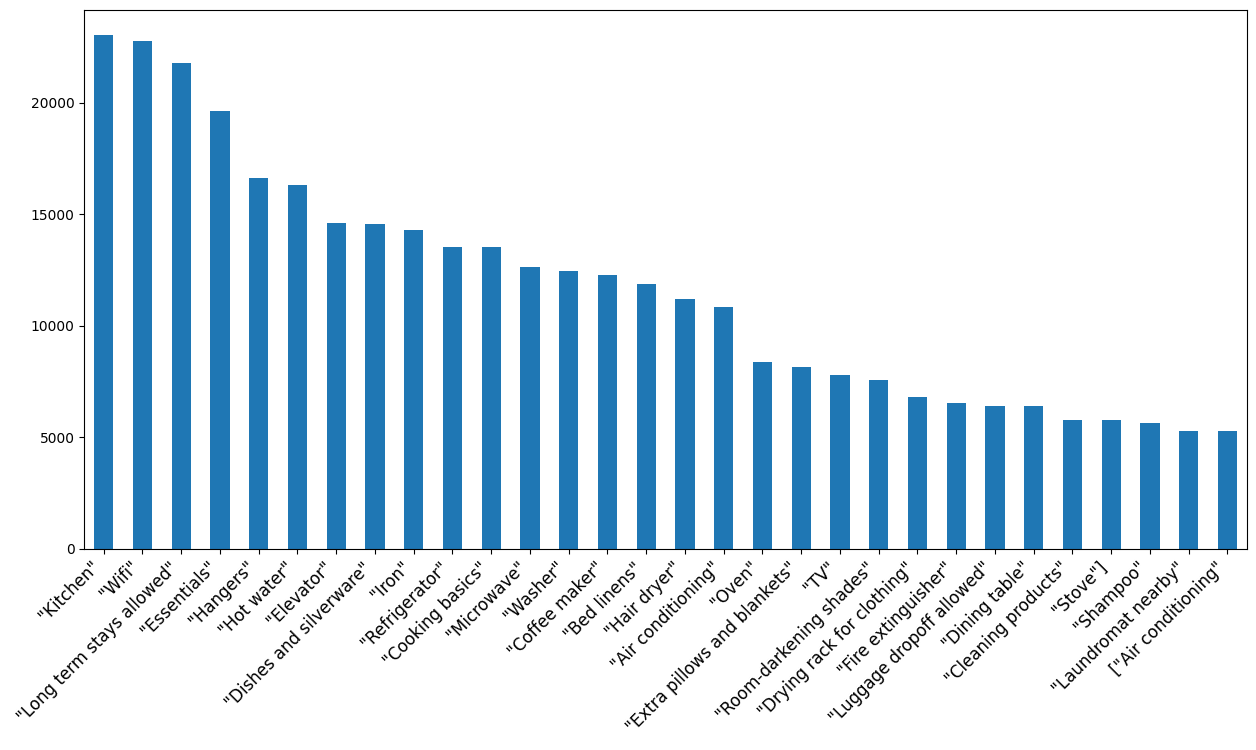

In [13]:
#PLOTANDO BARCHART DAS 25 AMENITIES MAIS LISTADAS.

pd.Series(np.concatenate(df['amenities'].map(lambda amns: amns.split(","))))\
    .value_counts().head(30)\
    .plot(kind='bar', figsize= (15,7))
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.show();